# Ray Tracing with Physgen Dataset

An example of using the ips framework (img_phy_sim).

The `ips.ray_tracing` part contains all useful functions to trace rays on 2D images.<br>
The `ips.img` provides very useful functions to work with images. Most of it are for showing images.

Contents:
- [Imports](#imports)
- [Data Loading](#data-loading)
- [Showing the Image](#showing-the-image)
- [Wall Maps](#wall-maps)
- [Ray Tracing](#ray-tracing)
- [Draw Rays](#draw-rays)
- [Comparison with Physgen Reflections](#comparison-with-physgen-reflections)

---
### Imports

In [1]:
import sys
sys.path += [".."] # os.path.abspath("../img-phy-sim")

import img_phy_sim as ips
from physgen_dataset import PhysGenDataset, get_image  # local module

import os
import random

import numpy as np
from torch.utils.data import DataLoader

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


---
### Data Loading

If already downloaded:

In [2]:
data_path = "../datasets/physgen_train_raw/osm/"

img_src = data_path + random.sample(os.listdir(data_path), 1)[0]
# img_src = data_path + "input_physgen_2822.png"
should_scale = True
img_src

'../datasets/physgen_train_raw/osm/input_physgen_1502.png'

Or:

In [3]:
# img_src = "./cache_img.png"
# ips.img.save(
#     get_image(mode='train', variation="sound_reflection", input_type="osm", output_type="complex_only", 
#               shuffle=True, return_output=False, as_numpy_array=True), 
#     img_src, should_scale=False)
# should_scale = False

# img_src

---
### Showing the Image

Loaded Image:
    - Image size: 256x256
    - Bit depth: 64-bit
    - Dtype: float64


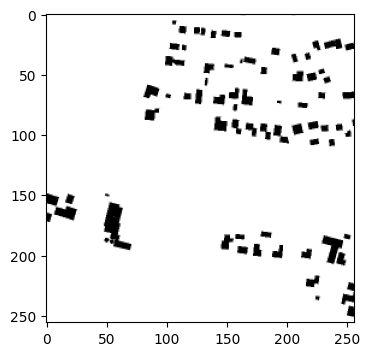

In [4]:
img = ips.img.open(src=img_src, should_scale=should_scale, should_print=True)
ips.img.imshow(img, size=4, axis_off=False)

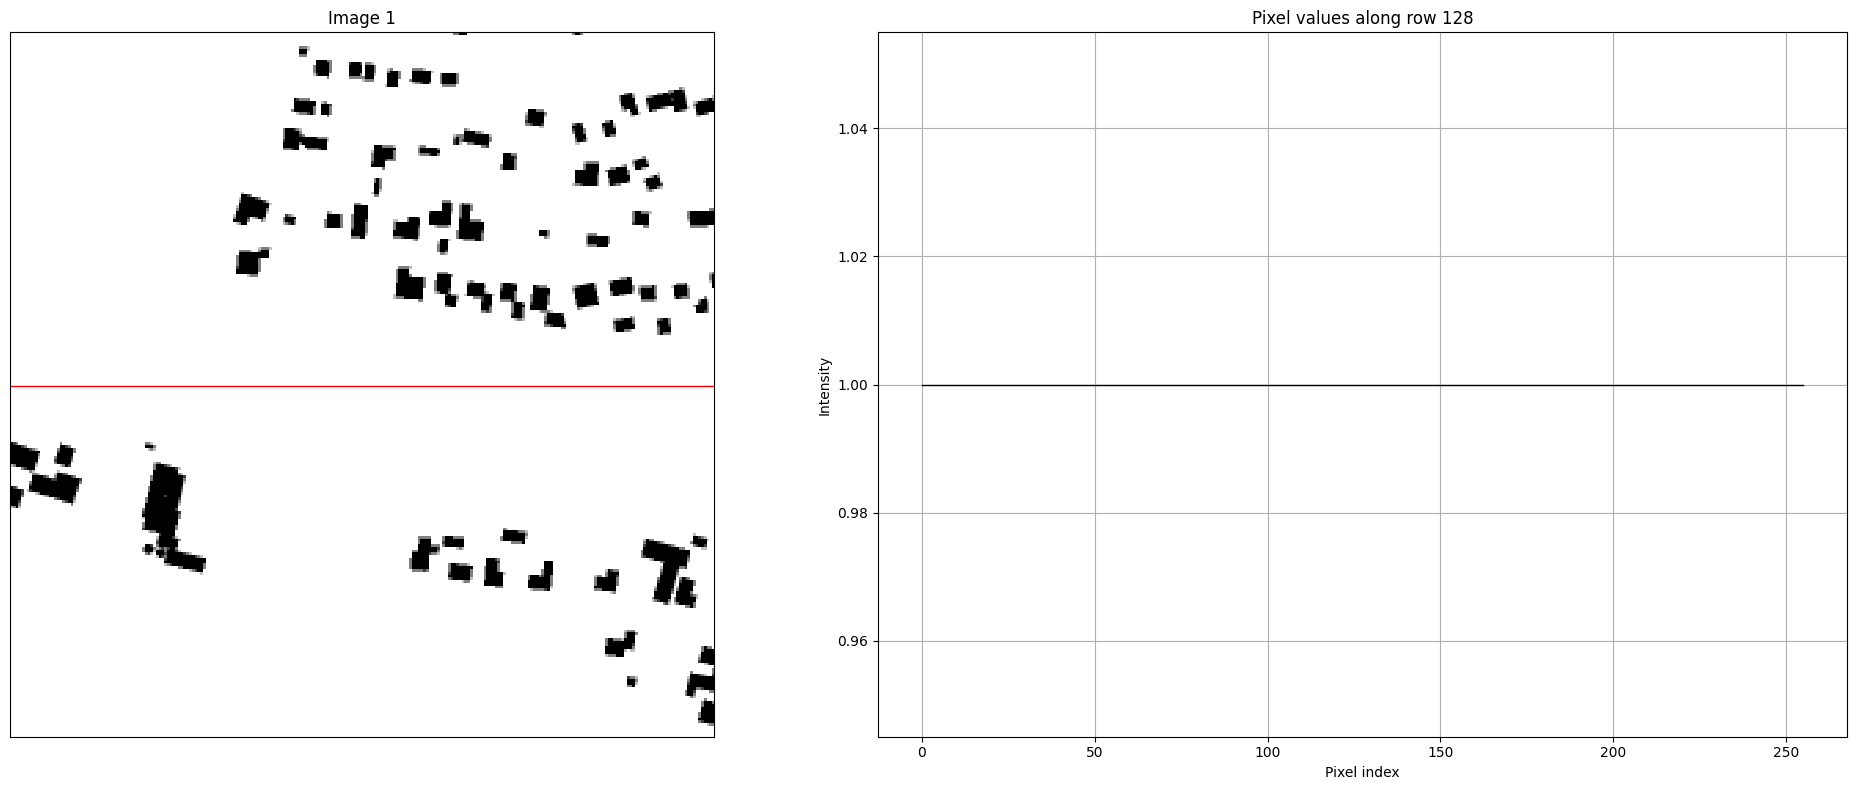

In [5]:
ips.img.show_image_with_line_and_profile(imgs=[img], axis='row', index=None, titles=None, figsize=(10, 8));

---
### Wall Map

The Wall Map shows the angle of the walls everything else is infinite.

This function will be automatically called from the `ips.ray_tracing.trace_beams` function. Therefore most of the time this function does not get called alone.

It features:
- `thickness`: custom thickness of the wall-map
- `wall_values`: auto edge detection or edge detection by given pixel-values, so possible are these 3 methods: None or 240 or [1.0, 0.5, 0.4]

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


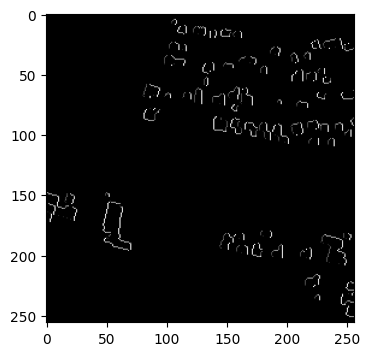

In [6]:
wall_map = ips.ray_tracing.get_wall_map(img, wall_values=None, thickness=0)
ips.img.imshow(wall_map, size=4, axis_off=False)

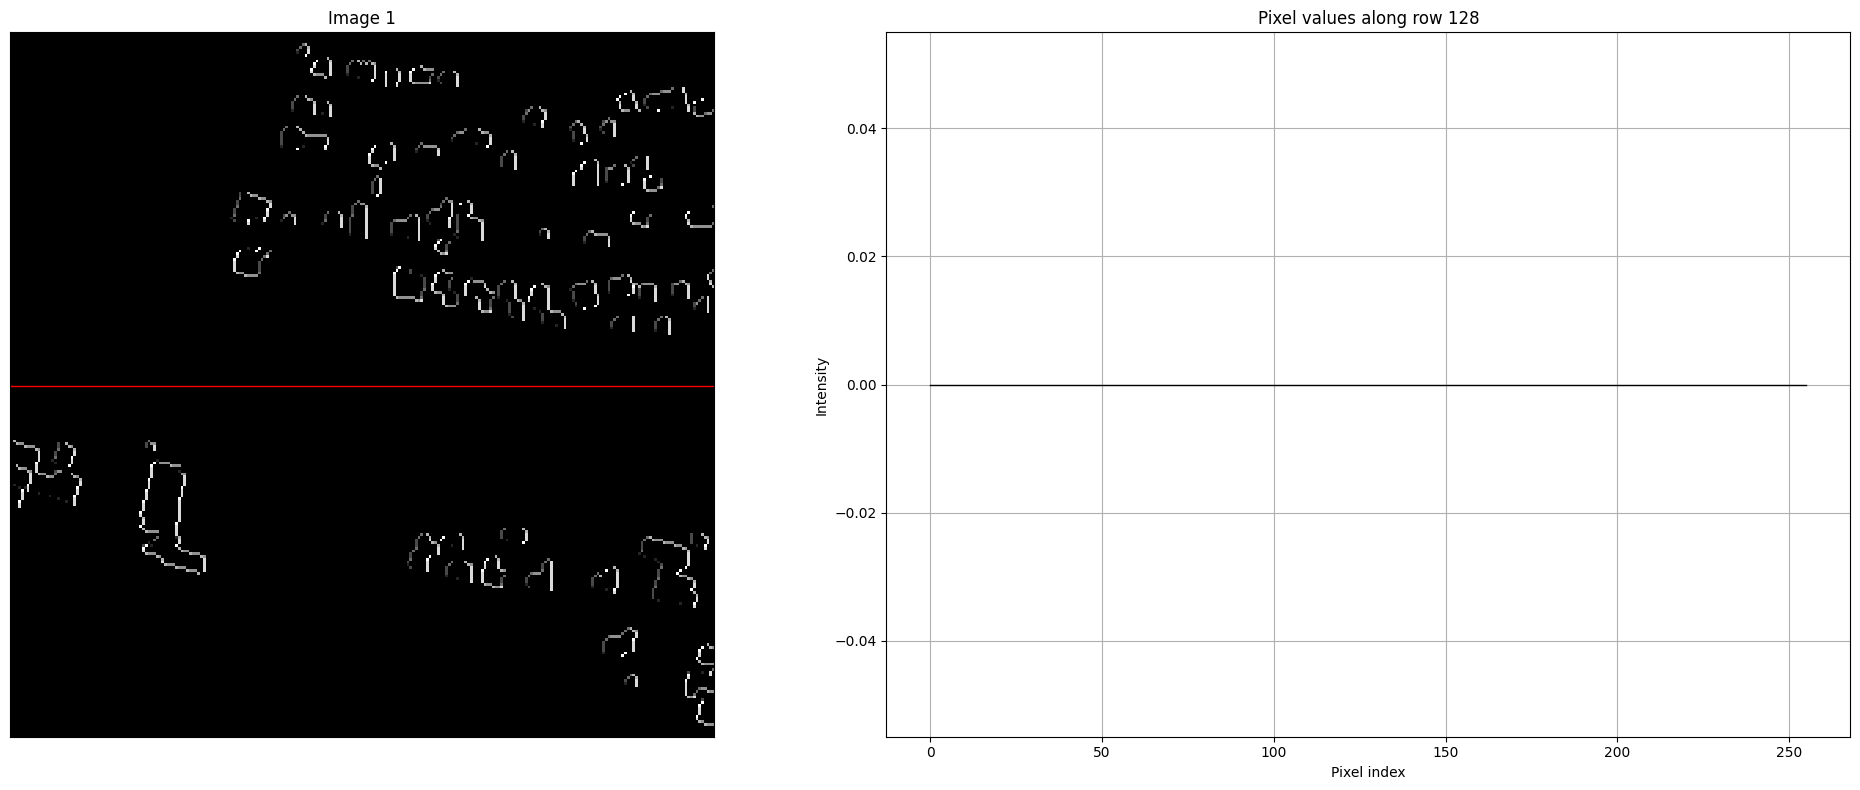

In [7]:
ips.img.show_image_with_line_and_profile(imgs=[wall_map], axis='row', index=None, titles=None, figsize=(10, 8));

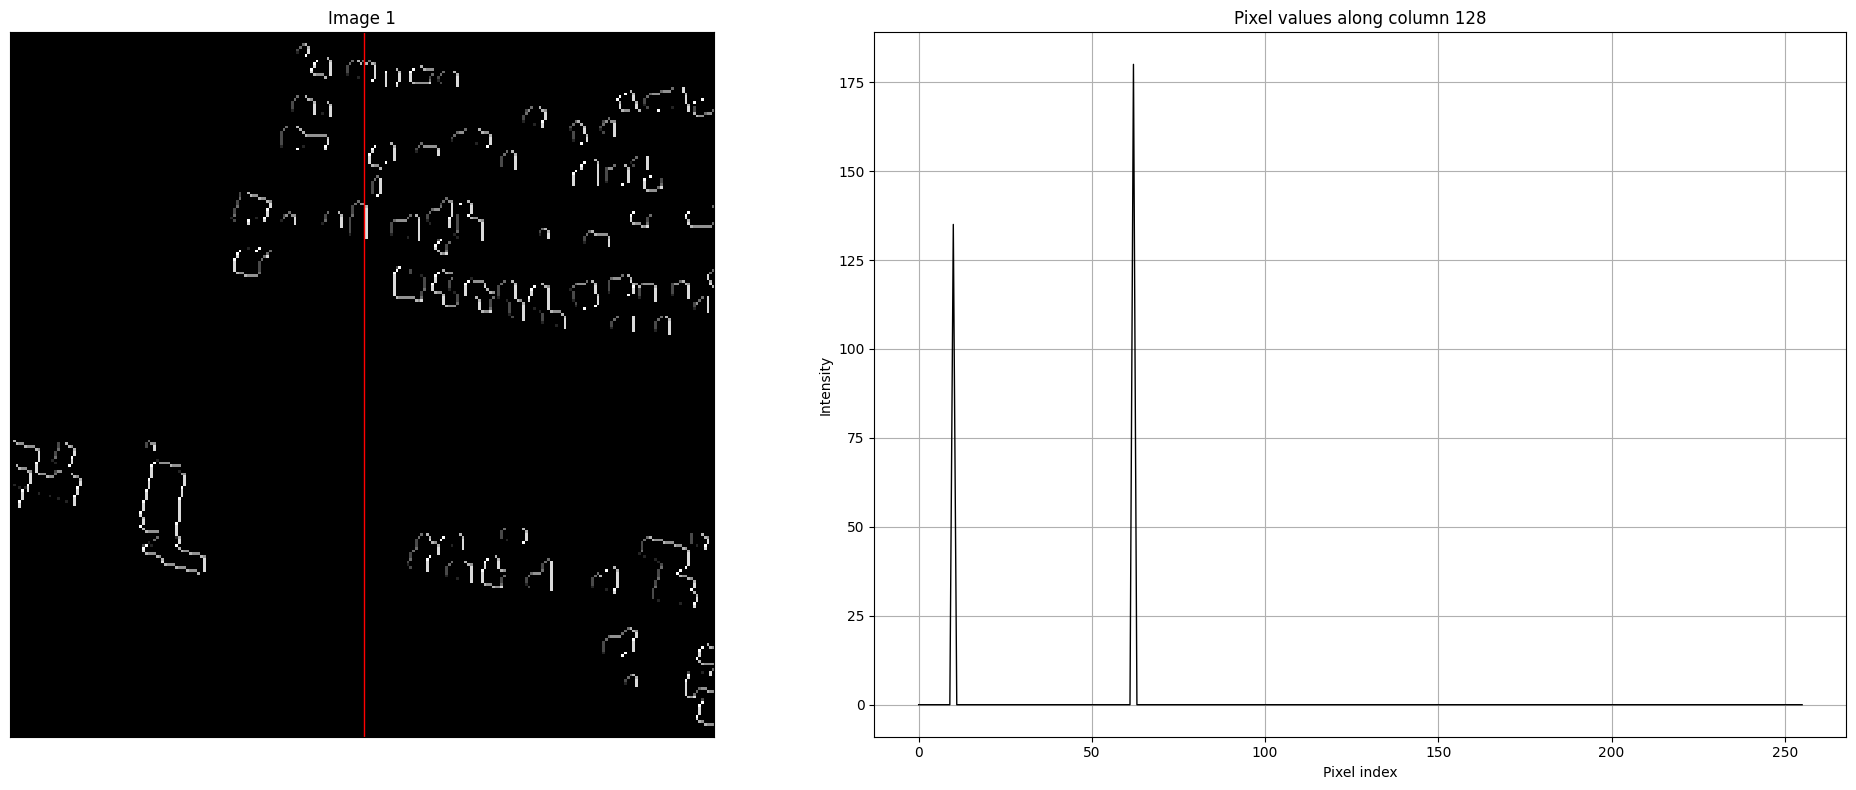

In [8]:
ips.img.show_image_with_line_and_profile(imgs=[wall_map], axis='column', index=None, titles=None, figsize=(10, 8));

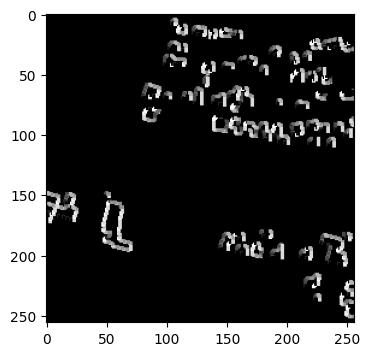

In [9]:
ips.img.imshow(ips.ray_tracing.get_wall_map(img, wall_values=None, thickness=1), size=4, axis_off=False)

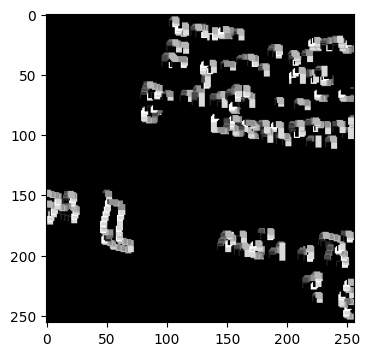

In [10]:
ips.img.imshow(ips.ray_tracing.get_wall_map(img, wall_values=None, thickness=2), size=4, axis_off=False)

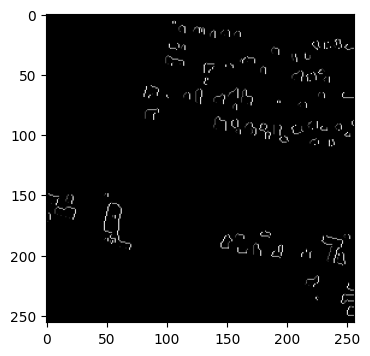

In [11]:
ips.img.imshow(ips.ray_tracing.get_wall_map(img, wall_values=0.0, thickness=0), size=4, axis_off=False)

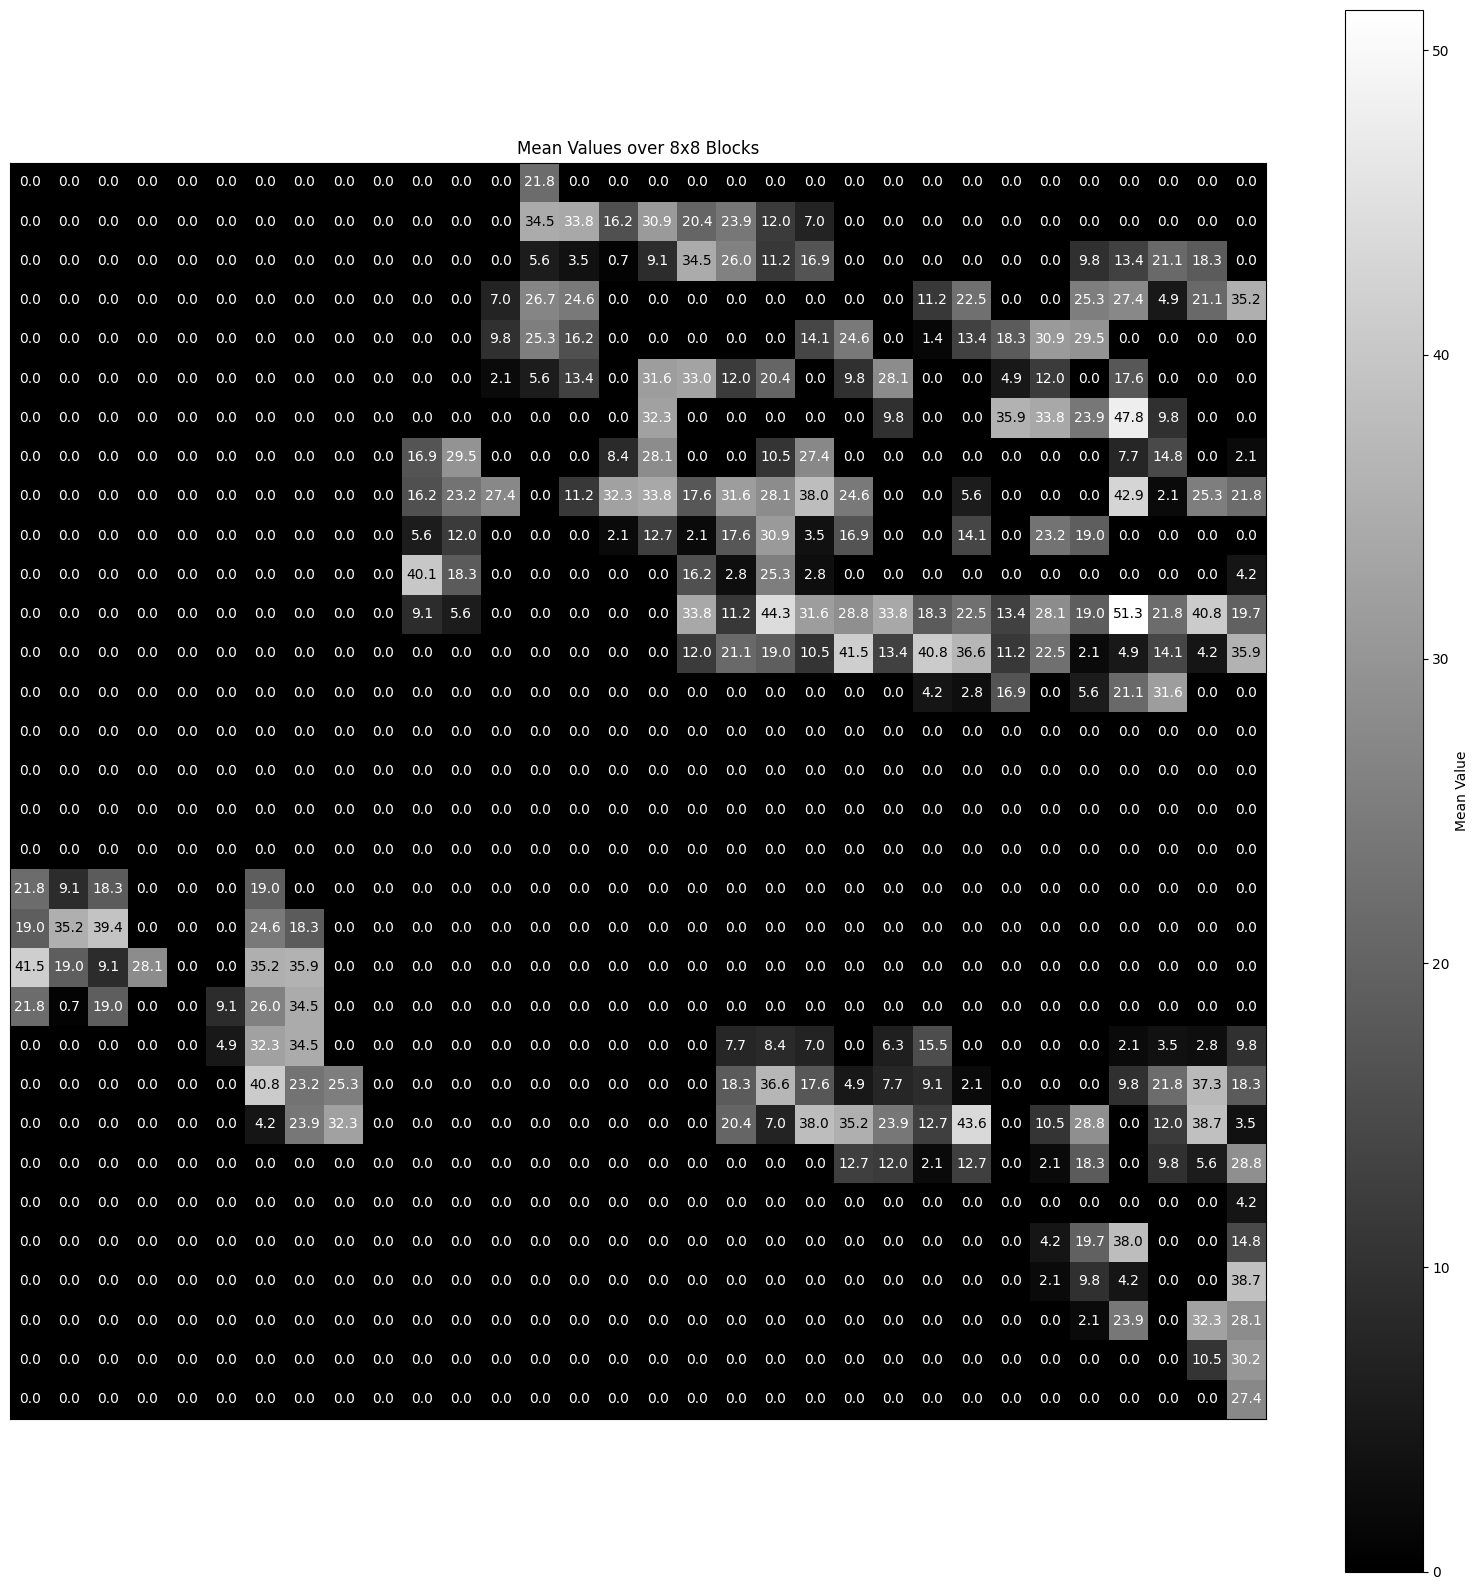

In [12]:
ips.img.plot_image_with_values(wall_map, block_size=8, 
                               cmap='gray', title=None, 
                               font_size=10, save_to=None)

---
### Ray Tracing

The `ips.ray_tracing.trace_beams` is the function to use for simulating the 2D ray tracing on an image.

Features are:
- Setting custom startposition for raytracing
- Adding custom beam shooting positions in degree (where 0° is the east/right of the image and 90° is south/bottom and so on)
- Setting reflexion order (how maxium reflexions should be calculated)
- Setting if the border of the image should be reflective or not
- And setting if the input image should be scaled and if the rays itself should be scaled
- You can also set the "wall" object values, which should get detected as objects with collision. If set to None, the programm will find all clear edges.

> Notice that the "wall" values will changed if you scale the image

Use the `ips.ray_tracing.print_rays_info` function to print informations about your rays.

In [13]:
rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=[0, 45],
                                   wall_values=None, 
                                   wall_thickness=1,
                                   img_border_also_collide=False,
                                   reflexion_order=0,
                                   should_scale_rays=True,
                                   should_scale_img=True)
ips.ray_tracing.print_rays_info(rays)

Rays: 2
Beams: 2
    - Mean Beams per Ray: 1.0
        - Median: 1.0
        - Max: 1
        - Min: 1
        - Variance: 0.0
Reflexions: 0
    - Mean Reflexions per Ray: 0.0
        - Median: 0.0
        - Max: 0
        - Min: 0
        - Variance: 0.0
Points: 235
    - Mean Points per Beam: 117.5
        - Median: 117.5
        - Max: 129
        - Min: 106
        - Variance: 11.5
    - Mean Point Values: 2.0
        - Median: 2.0
        - Variance: 0.0

Value-Range:
  x ∈ [0.50, 1.00]
  y ∈ [0.50, 0.71]

Example:
Ray 1, beams: 1
Ray 1, beam 1, points: 129
Ray 1, beam 1, point 1: 2




In [14]:
rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=10),
                                   wall_values=None, 
                                   wall_thickness=1,
                                   img_border_also_collide=False,
                                   reflexion_order=1,
                                   should_scale_rays=True,
                                   should_scale_img=True)
ips.ray_tracing.print_rays_info(rays)

Rays: 36
Beams: 57
    - Mean Beams per Ray: 1.6
        - Median: 2.0
        - Max: 2
        - Min: 1
        - Variance: 0.5
Reflexions: 21
    - Mean Reflexions per Ray: 0.6
        - Median: 1.0
        - Max: 1
        - Min: 0
        - Variance: 0.5
Points: 6225
    - Mean Points per Beam: 109.2
        - Median: 129.0
        - Max: 252
        - Min: 2
        - Variance: 72.8
    - Mean Point Values: 2.0
        - Median: 2.0
        - Variance: 0.0

Value-Range:
  x ∈ [-0.00, 1.00]
  y ∈ [-0.00, 1.00]

Example:
Ray 1, beams: 1
Ray 1, beam 1, points: 129
Ray 1, beam 1, point 1: 2




Scaling (notice that both images are equal)


Not Scaled Ray: [(128.0, 128.0), (129.0, 128.40402622583517), (130.0, 128.8080524516703)]
Scaled Ray: [(0.5019607843137255, 0.5019607843137255), (0.5058823529411764, 0.5035452008856282), (0.5098039215686274, 0.5051296174575306)]


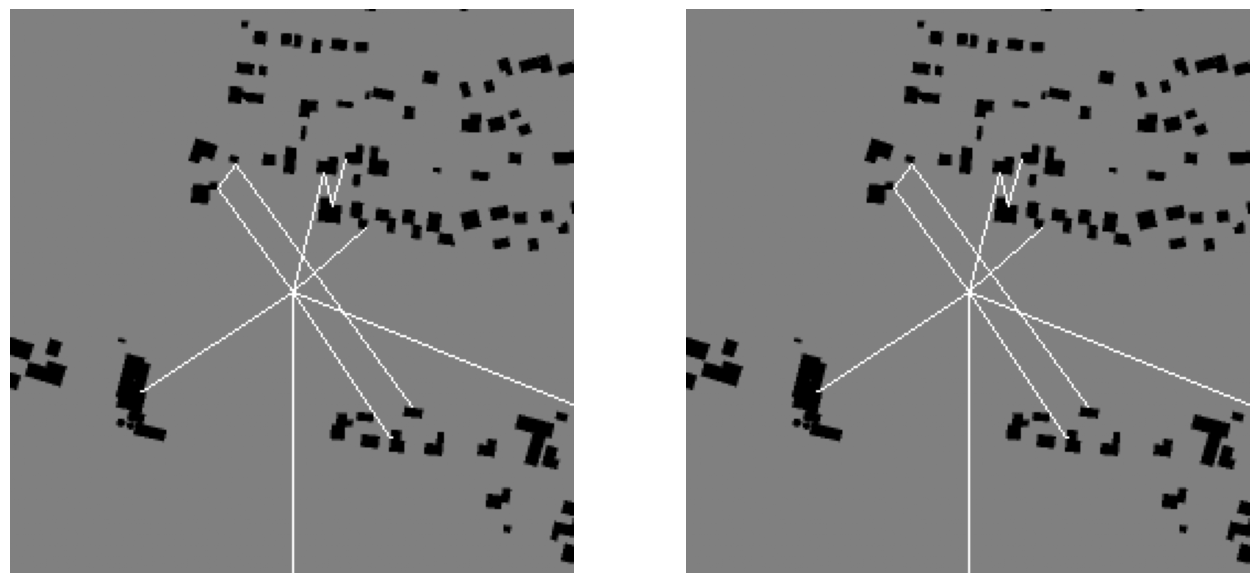

In [15]:
rays_ = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=[22, 56, 90, 146, 234, 285, 320],
                                   wall_values=0.0, 
                                   wall_thickness=0,
                                   img_border_also_collide=False,
                                   reflexion_order=2,
                                   should_scale_rays=False,
                                   should_scale_img=True)
print("\nNot Scaled Ray:", rays_[0][0][:min(len(rays_[0][0])-1, 3)])

ray_img_1 = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=False, original_max_width=None, original_max_height=None)

rays_ = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=[22, 56, 90, 146, 234, 285, 320],
                                   wall_values=0.0, 
                                   wall_thickness=0,
                                   img_border_also_collide=False,
                                   reflexion_order=2,
                                   should_scale_rays=True,
                                   should_scale_img=True)

print("Scaled Ray:", rays_[0][0][:min(len(rays_[0][0])-1, 3)])

ray_img_2 = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.advanced_imshow([ray_img_1, ray_img_2], title=None, image_width=8, axis=False,
                        color_space="gray", cmap=None, cols=2, save_to=None,
                        hspace=0.2, wspace=0.2,
                        use_original_style=False, invert=False)

In [16]:
len(rays_[0])

1

In [17]:
len(rays_[0][0])

180

In [18]:
len(rays_[0][0][0])

2

Image Border Collision + Reflexion Order Showcase

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


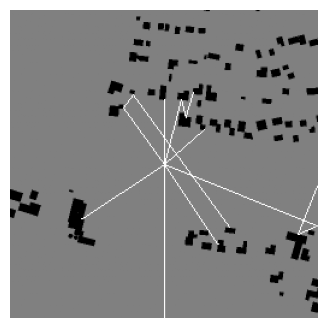

In [19]:
rays_ = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=[22, 56, 90, 146, 234, 285, 320],
                                   wall_values=0.0, 
                                   wall_thickness=0,
                                   img_border_also_collide=True,
                                   reflexion_order=2,
                                   should_scale_rays=False,
                                   should_scale_img=True)

ray_img = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=False, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

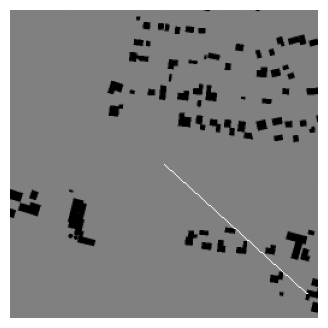

In [20]:
rays_ = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=[42],
                                   wall_values=0.0, 
                                   wall_thickness=0,
                                   img_border_also_collide=True,
                                   reflexion_order=20,
                                   should_scale_rays=False,
                                   should_scale_img=True)

ray_img = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=False, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

Change position

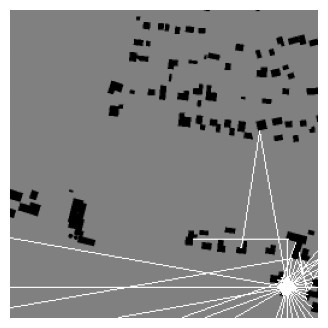

In [21]:
rays_ = ips.ray_tracing.trace_beams(rel_position=[0.9, 0.9], 
                                   img_src=img_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=10),
                                   wall_values=0.0, 
                                   wall_thickness=0,
                                   img_border_also_collide=False,
                                   reflexion_order=3,
                                   should_scale_rays=True,
                                   should_scale_img=True)

ray_img = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

Loading and Saving

In [22]:
rays_saved = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                        img_src=img_src, 
                                        directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=10),
                                        wall_values=None, 
                                        wall_thickness=1,
                                        img_border_also_collide=False,
                                        reflexion_order=1,
                                        should_scale_rays=True,
                                        should_scale_img=True)
ips.ray_tracing.print_rays_info(rays_saved)
ips.ray_tracing.save(path="./my_awesome_rays.txt", rays=rays_saved)

rays_loaded = ips.ray_tracing.open(path="./my_awesome_rays.txt")

print(f"\n{rays_saved == rays_loaded=}\n")
ips.ray_tracing.print_rays_info(rays_loaded)

Rays: 36
Beams: 57
    - Mean Beams per Ray: 1.6
        - Median: 2.0
        - Max: 2
        - Min: 1
        - Variance: 0.5
Reflexions: 21
    - Mean Reflexions per Ray: 0.6
        - Median: 1.0
        - Max: 1
        - Min: 0
        - Variance: 0.5
Points: 6225
    - Mean Points per Beam: 109.2
        - Median: 129.0
        - Max: 252
        - Min: 2
        - Variance: 72.8
    - Mean Point Values: 2.0
        - Median: 2.0
        - Variance: 0.0

Value-Range:
  x ∈ [-0.00, 1.00]
  y ∈ [-0.00, 1.00]

Example:
Ray 1, beams: 1
Ray 1, beam 1, points: 129
Ray 1, beam 1, point 1: 2



rays_saved == rays_loaded=True

Rays: 36
Beams: 57
    - Mean Beams per Ray: 1.6
        - Median: 2.0
        - Max: 2
        - Min: 1
        - Variance: 0.5
Reflexions: 21
    - Mean Reflexions per Ray: 0.6
        - Median: 1.0
        - Max: 1
        - Min: 0
        - Variance: 0.5
Points: 6225
    - Mean Points per Beam: 109.2
        - Median: 129.0
        - Max: 252
        - Min: 2


Merging rays

In [23]:
rays_1 = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=60),
                                   wall_values=None, 
                                   wall_thickness=1,
                                   img_border_also_collide=False,
                                   reflexion_order=1,
                                   should_scale_rays=True,
                                   should_scale_img=True)
ips.ray_tracing.print_rays_info(rays_1)

rays_2 = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=90, offset=3),
                                   wall_values=None, 
                                   wall_thickness=1,
                                   img_border_also_collide=False,
                                   reflexion_order=1,
                                   should_scale_rays=True,
                                   should_scale_img=True)
ips.ray_tracing.print_rays_info(rays_2)

merged_rays = ips.ray_tracing.merge(rays_1, rays_2)
ips.ray_tracing.print_rays_info(merged_rays)

del merged_rays, rays_1, rays_2

Rays: 6
Beams: 9
    - Mean Beams per Ray: 1.5
        - Median: 1.5
        - Max: 2
        - Min: 1
        - Variance: 0.5
Reflexions: 3
    - Mean Reflexions per Ray: 0.5
        - Median: 0.5
        - Max: 1
        - Min: 0
        - Variance: 0.5
Points: 1032
    - Mean Points per Beam: 114.7
        - Median: 129.0
        - Max: 203
        - Min: 2
        - Variance: 61.2
    - Mean Point Values: 2.0
        - Median: 2.0
        - Variance: 0.0

Value-Range:
  x ∈ [0.00, 1.00]
  y ∈ [0.26, 1.00]

Example:
Ray 1, beams: 1
Ray 1, beam 1, points: 129
Ray 1, beam 1, point 1: 2


Rays: 4
Beams: 5
    - Mean Beams per Ray: 1.2
        - Median: 1.0
        - Max: 2
        - Min: 1
        - Variance: 0.4
Reflexions: 1
    - Mean Reflexions per Ray: 0.2
        - Median: 0.0
        - Max: 1
        - Min: 0
        - Variance: 0.4
Points: 636
    - Mean Points per Beam: 127.2
        - Median: 136.0
        - Max: 143
        - Min: 85
        - Variance: 21.3
    - Mean Point

Let's beeing fancy and try out the merging furthermore 

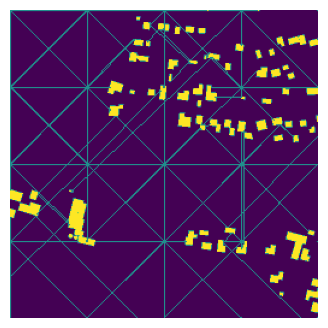

In [24]:
rays_ = None
max_ = 5
for x in range(0, max_):
    for y in range(0, max_):
        new_rays = ips.ray_tracing.trace_beams(rel_position=[x/(max_-1), y/(max_-1)], 
                                                img_src=img_src, 
                                                directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=45),
                                                wall_values=0.0, 
                                                wall_thickness=0,
                                                img_border_also_collide=False,
                                                reflexion_order=2,
                                                should_scale_rays=True,
                                                should_scale_img=True)
        rays_ = ips.ray_tracing.merge(rays_, new_rays) if rays_ else new_rays

ray_img = ips.ray_tracing.draw_rays(rays_, 
                                    detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=0.5, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4, cmap="random")
del rays_

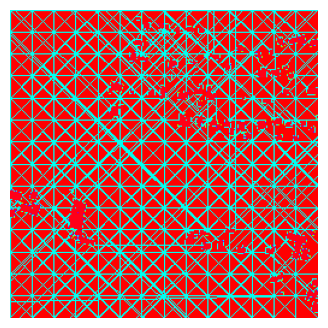

In [25]:
rays_ = None
max_ = 15
for x in range(0, max_):
    for y in range(0, max_):
        new_rays = ips.ray_tracing.trace_beams(rel_position=[x/(max_-1), y/(max_-1)], 
                                                img_src=img_src, 
                                                directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=45),
                                                wall_values=0.0, 
                                                wall_thickness=0,
                                                img_border_also_collide=False,
                                                reflexion_order=2,
                                                should_scale_rays=True,
                                                should_scale_img=True)
        rays_ = ips.ray_tracing.merge(rays_, new_rays) if rays_ else new_rays

ray_img = ips.ray_tracing.draw_rays(rays_, 
                                    detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=0.5, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4, cmap="random")
del rays_

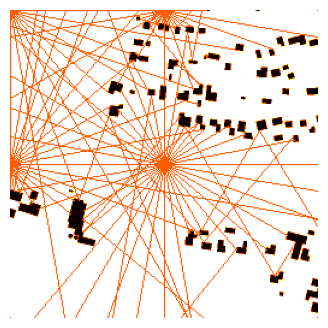

In [26]:
rays_ = None
max_ = 3
for x in range(0, max_):
    for y in range(0, max_):
        new_rays = ips.ray_tracing.trace_beams(rel_position=[x/(max_-1), y/(max_-1)], 
                                                img_src=img_src, 
                                                directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=10),
                                                wall_values=0.0, 
                                                wall_thickness=0,
                                                img_border_also_collide=False,
                                                reflexion_order=2,
                                                should_scale_rays=True,
                                                should_scale_img=True)
        rays_ = ips.ray_tracing.merge(rays_, new_rays) if rays_ else new_rays

ray_img = ips.ray_tracing.draw_rays(rays_, 
                                    detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=0.5, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4, cmap="random")
del rays_

Let's make it even more fancy and add collision to the rays

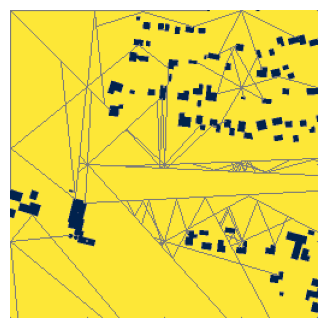

In [27]:
rays_ = None
ray_img = None
max_ = 5
offset = 0
for x in range(0, max_):
    for y in range(0, max_):
        new_rays = ips.ray_tracing.trace_beams(rel_position=[x/(max_-1), y/(max_-1)], 
                                                img_src=ray_img if type(ray_img) != type(None) else img_src, 
                                                directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=45, offset=offset),
                                                wall_values=[0.0, 0.5], 
                                                wall_thickness=0,
                                                img_border_also_collide=False,
                                                reflexion_order=2,
                                                should_scale_rays=True,
                                                should_scale_img=True)
        offset += np.random.random() *90
        # rays_ = ips.ray_tracing.merge(rays_, new_rays) if rays_ else new_rays

        ray_img = ips.ray_tracing.draw_rays(new_rays, 
                                            detail_draw=False, 
                                            output_format="single_image", 
                                            img_background=ray_img if type(ray_img) != type(None) else img, ray_value=0.5, ray_thickness=1, 
                                            img_shape=(256, 256), dtype=float, standard_value=0,
                                            should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4, cmap="random")
del rays_

---
### Draw Rays

Export Rays into images. Here we cover some of the major features.

- Custom value of ray-traces
- Thickness of ray-traces
- Drawing on empty image or an existing image
    - Given image-shape, dtype and fill-value (standard-value)
- Scaling rays to the given image
- Different Format Types
    - One Image
    - Multiple Images (each ray on one image)
    - One Image and each channel is one ray
- Showing only the reflexions
- Give different values for different reflexion orders

**Basics**: Use the `ips.ray_tracing.draw_rays` to draw rays or use the `ips.ray_tracing.trace_and_draw_rays` to calculate the rays and draw/export these as an image and this for multiple images. 

Via the `ray_value` you set the pixel value which the rays should get in the image. The `ray_thickness` defines how thick the ray lines/points should get plottet /drawn on the image.

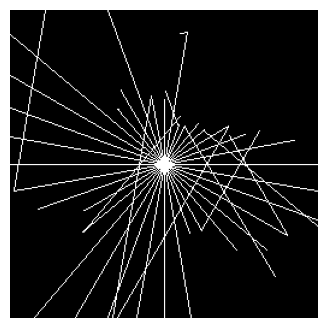

In [28]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

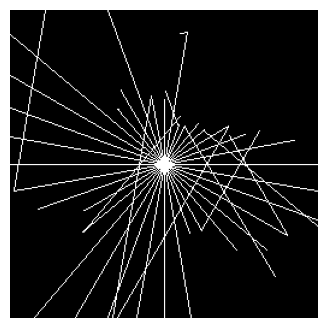

In [29]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

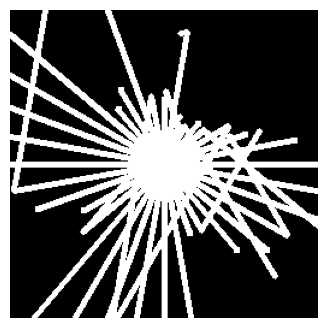

In [30]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=2, ray_thickness=4, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

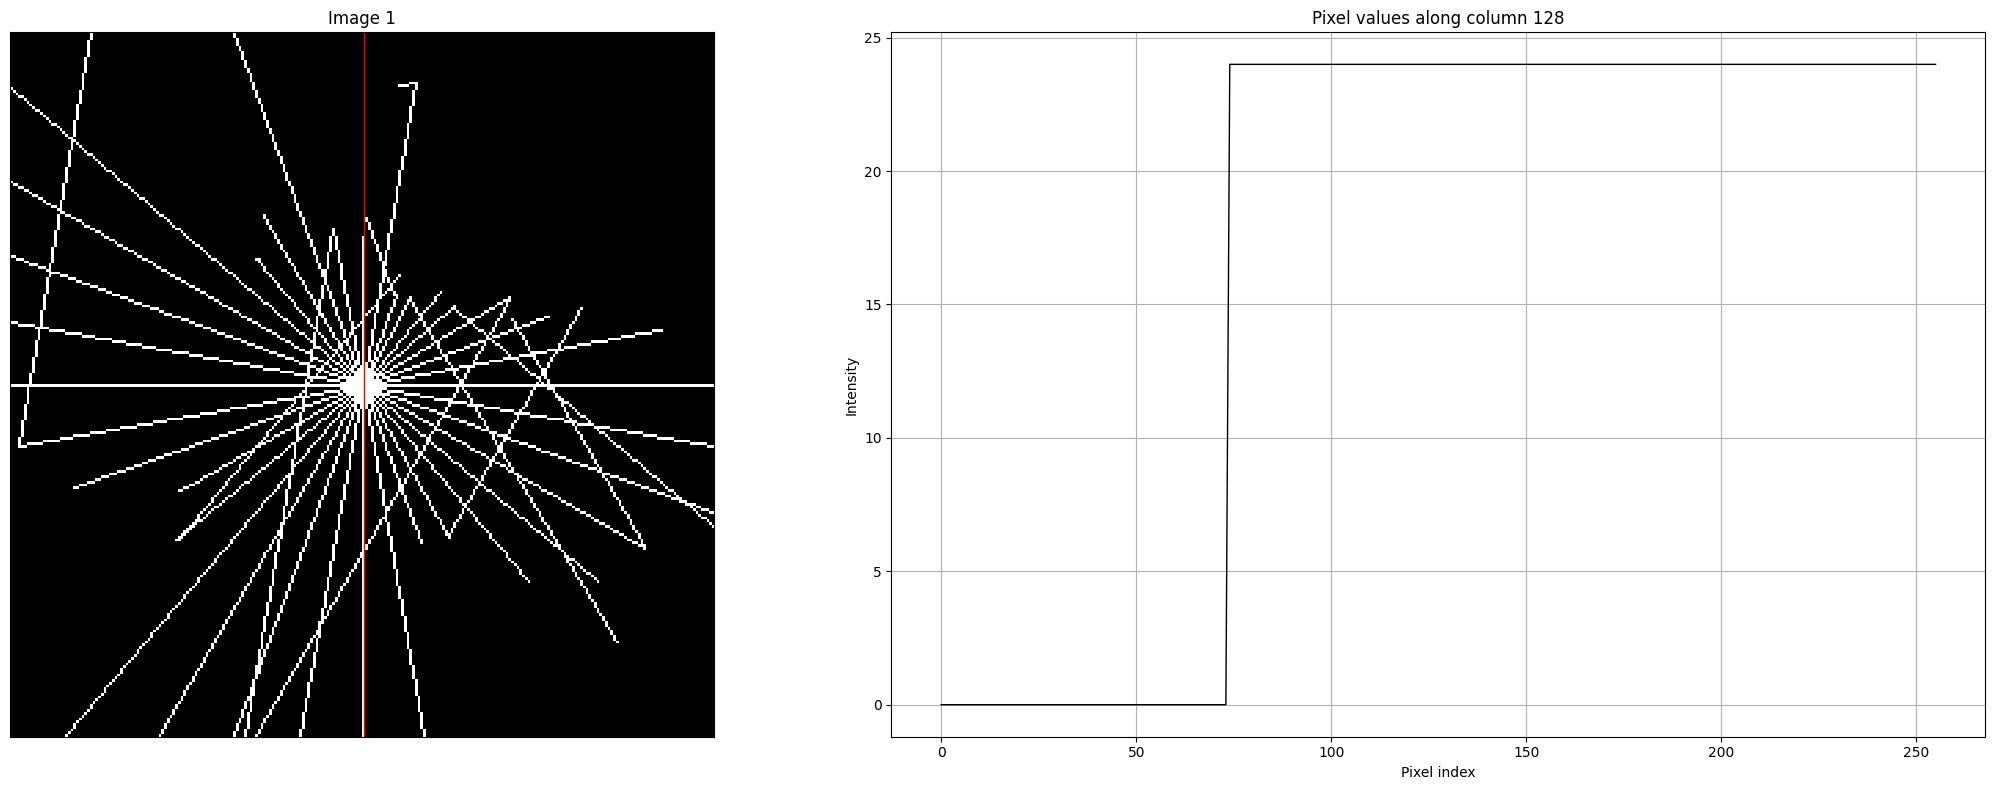

In [31]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=24, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.show_image_with_line_and_profile(imgs=[ray_img], axis='column', index=None, titles=None, figsize=(11, 8));

**Detail Levels**: There are 2 levels of detail. 
1. One is exactly the way the rays got calculated pixel by pixel
2. The other is an approximation where lines are drawn from only he star tand the end point of each beam

See that here:

(256, 256)


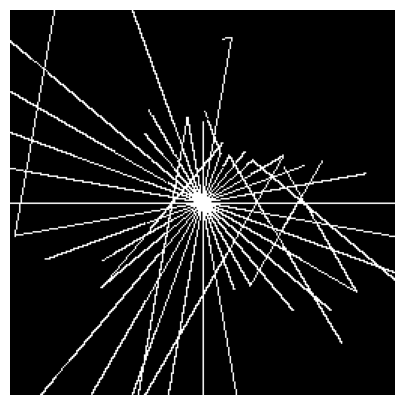

In [32]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=True, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(ray_img.shape)
ips.img.imshow(ray_img, size=5)

(256, 256)


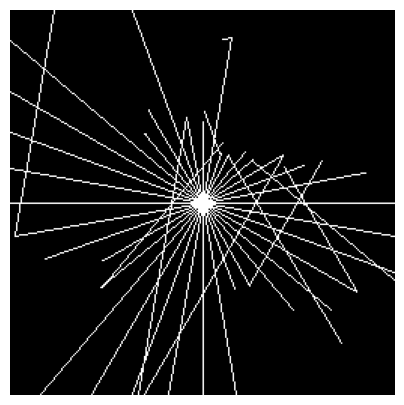

In [33]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(ray_img.shape)
ips.img.imshow(ray_img, size=5)

**Background Image**: For each format you can choose if you want an empty image or an background image. For the empty image you can use the `image_shape`, `dtype` and the `standard_value` to set the base settings for your image.

(256, 256)


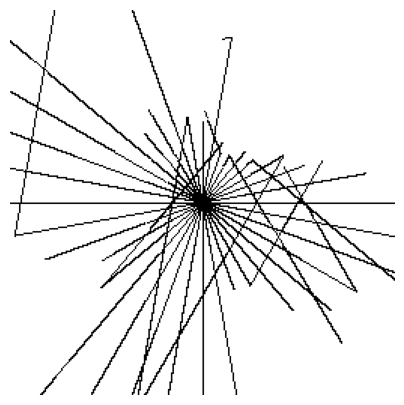

In [34]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=True, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=0, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=255,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(ray_img.shape)
ips.img.imshow(ray_img, size=5)

(256, 256)


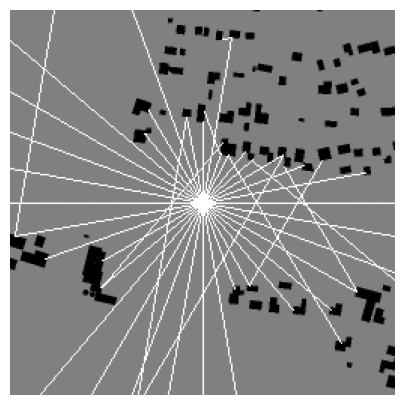

In [35]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(ray_img.shape)
ips.img.imshow(ray_img, size=5)

This comes also useful with the auto scaling with the image:

(512, 512)


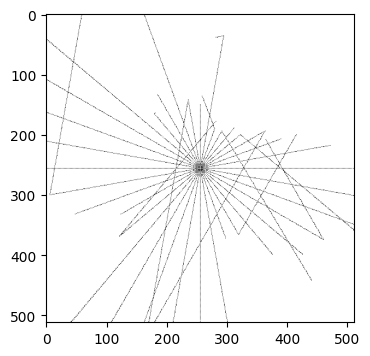

In [36]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=True, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=0, ray_thickness=1, 
                                    img_shape=(512, 512), dtype=float, standard_value=255,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(ray_img.shape)
ips.img.imshow(ray_img, size=4, axis_off=False)

**Formats:**

There are 3 formats: as a single image, every ray as a single image (so multiple image output) or one image output but with multiple channels and each ray is in one ray. <br>
In every format you can set a background image or a compelte new image.

<br><br>

We already saw the single image, let's have a look on the other 2 formats:

36
(256, 256)


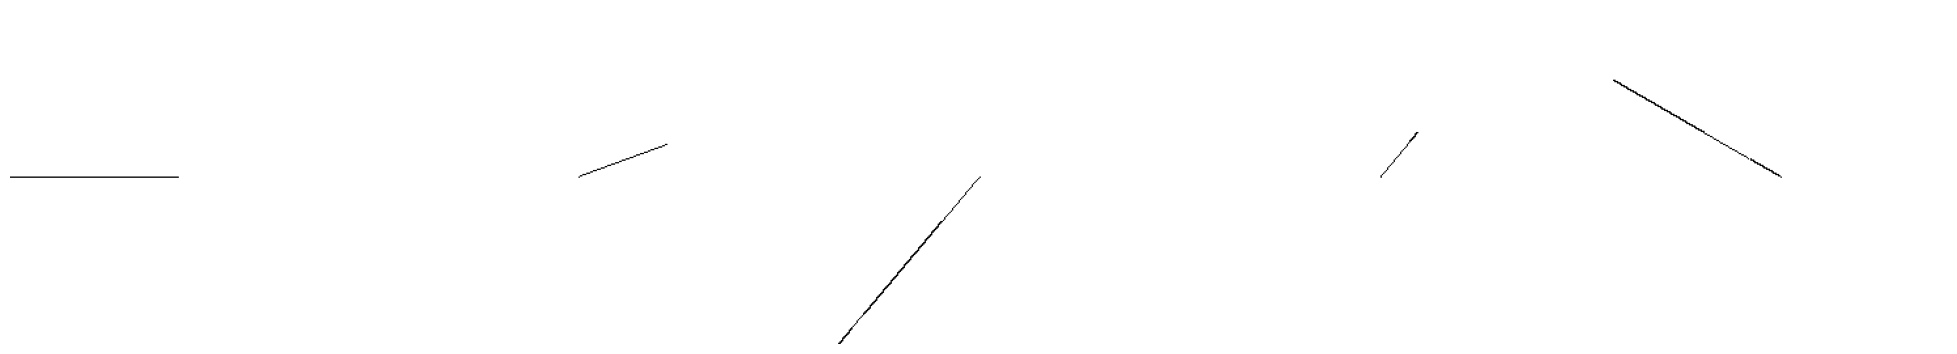

In [37]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=True,
                                    output_format="multiple_images", 
                                    img_background=None, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(len(ray_img))
print(ray_img[0].shape)
ips.img.advanced_imshow(random.sample(ray_img, min(len(ray_img), 5)), title=None, image_width=5, axis=False,
                        color_space="RGB", cmap=None, cols=min(len(ray_img), 5), save_to=None,
                        hspace=0.2, wspace=0.2,
                        use_original_style=False, invert=False)

36
(256, 256)


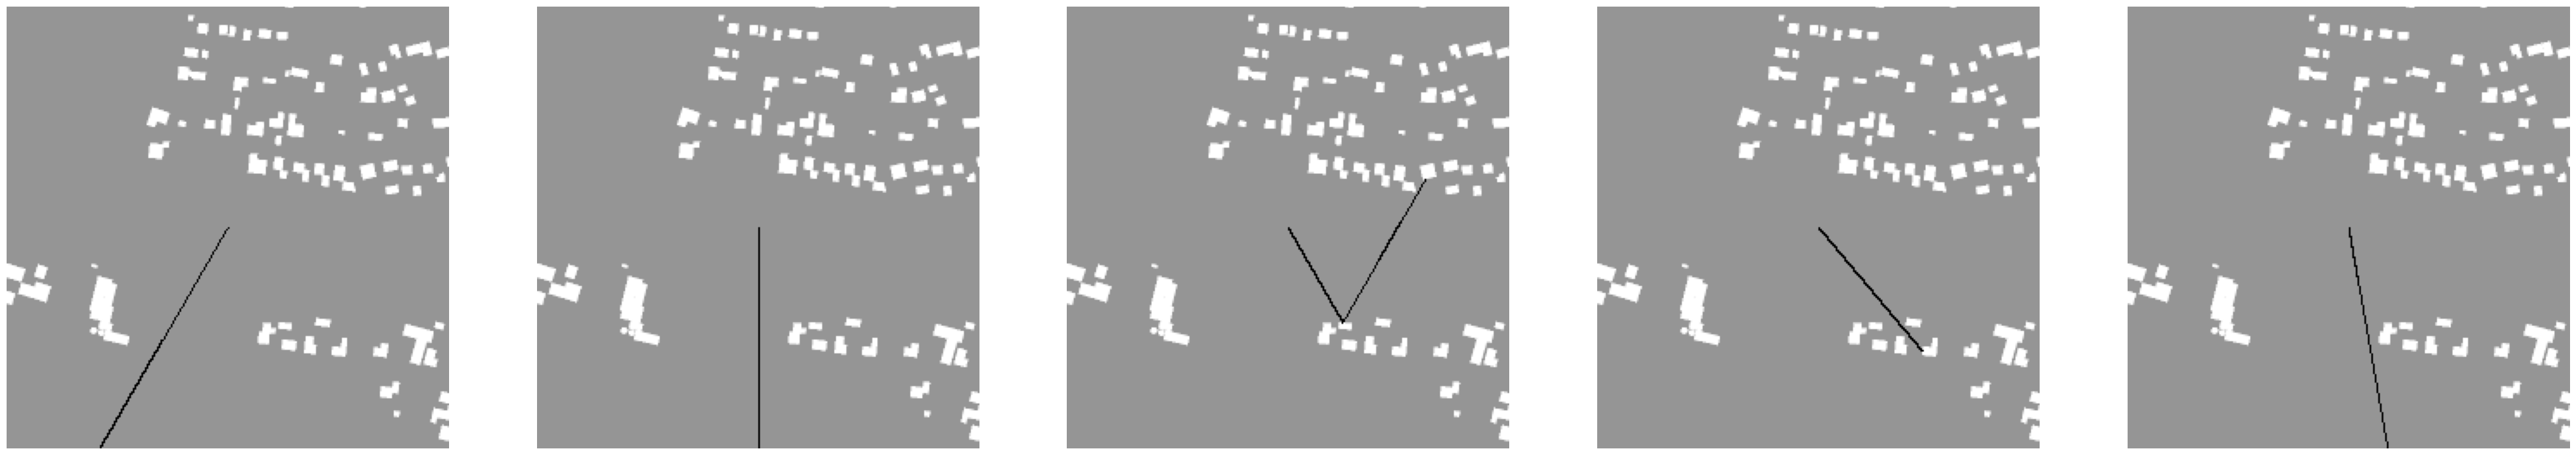

In [38]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=True,
                                    output_format="multiple_images", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(len(ray_img))
print(ray_img[0].shape)
ips.img.advanced_imshow(random.sample(ray_img, min(len(ray_img), 5)), title=None, image_width=10, axis=False,
                        color_space="RGB", cmap=None, cols=min(len(ray_img), 5), save_to=None,
                        hspace=0.2, wspace=0.2,
                        use_original_style=False, invert=False)

Let's see the channels and notice the output of the shape!

(256, 256, 36)


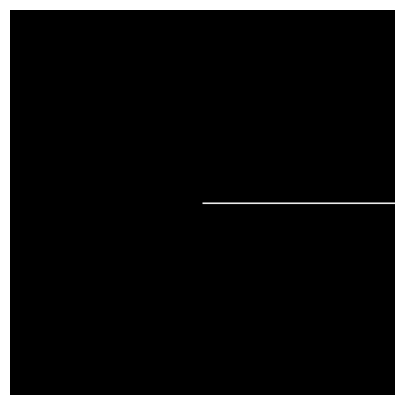

In [39]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=True,
                                    output_format="channels", 
                                    img_background=None, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(ray_img.shape)
ips.img.imshow(ray_img[..., 0], size=5)

(256, 256, 36)


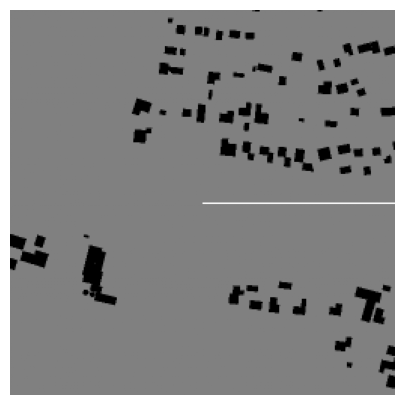

In [40]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=True,
                                    output_format="channels", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
print(ray_img.shape)
ips.img.imshow(ray_img[..., 0], size=5)

We can also pass multiple values for the rays which will give the different reflexion order different values 

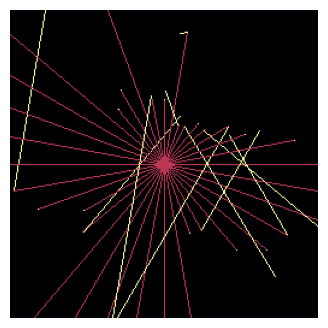

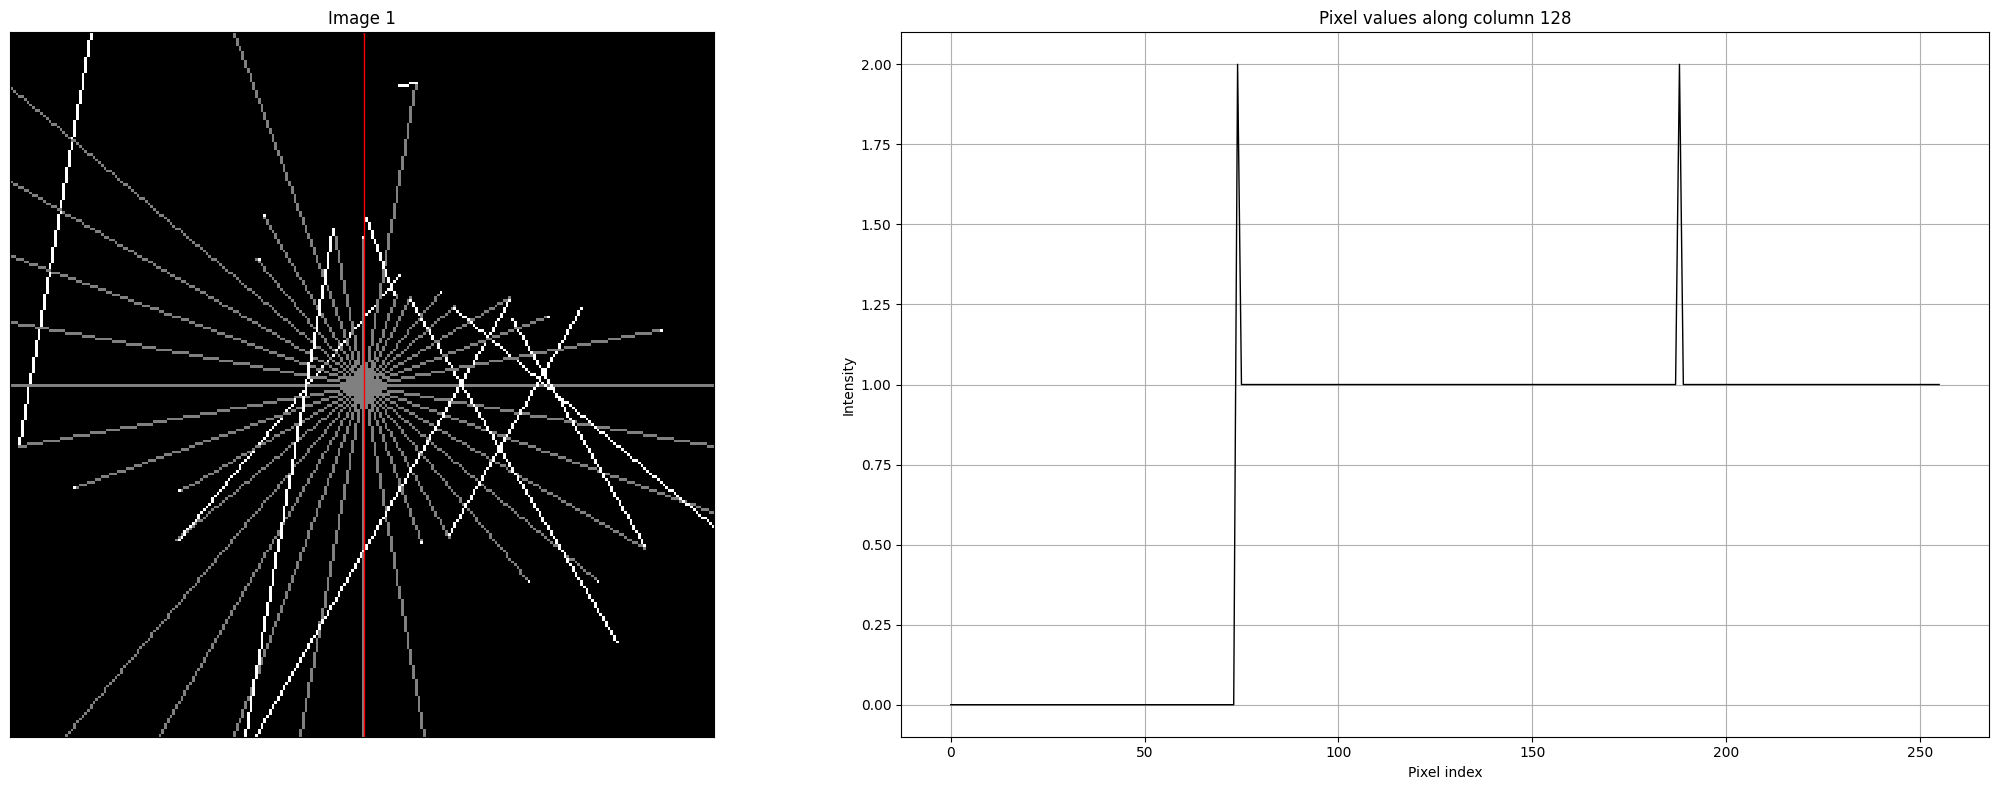

In [41]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=[1.0, 2.0], ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4, cmap="inferno")
ips.img.show_image_with_line_and_profile(imgs=[ray_img], axis='column', index=None, titles=None, figsize=(11, 8));

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


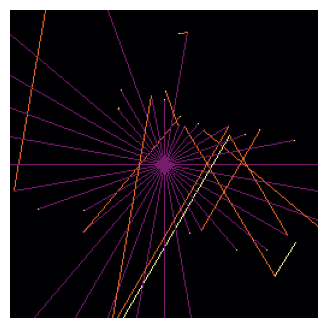

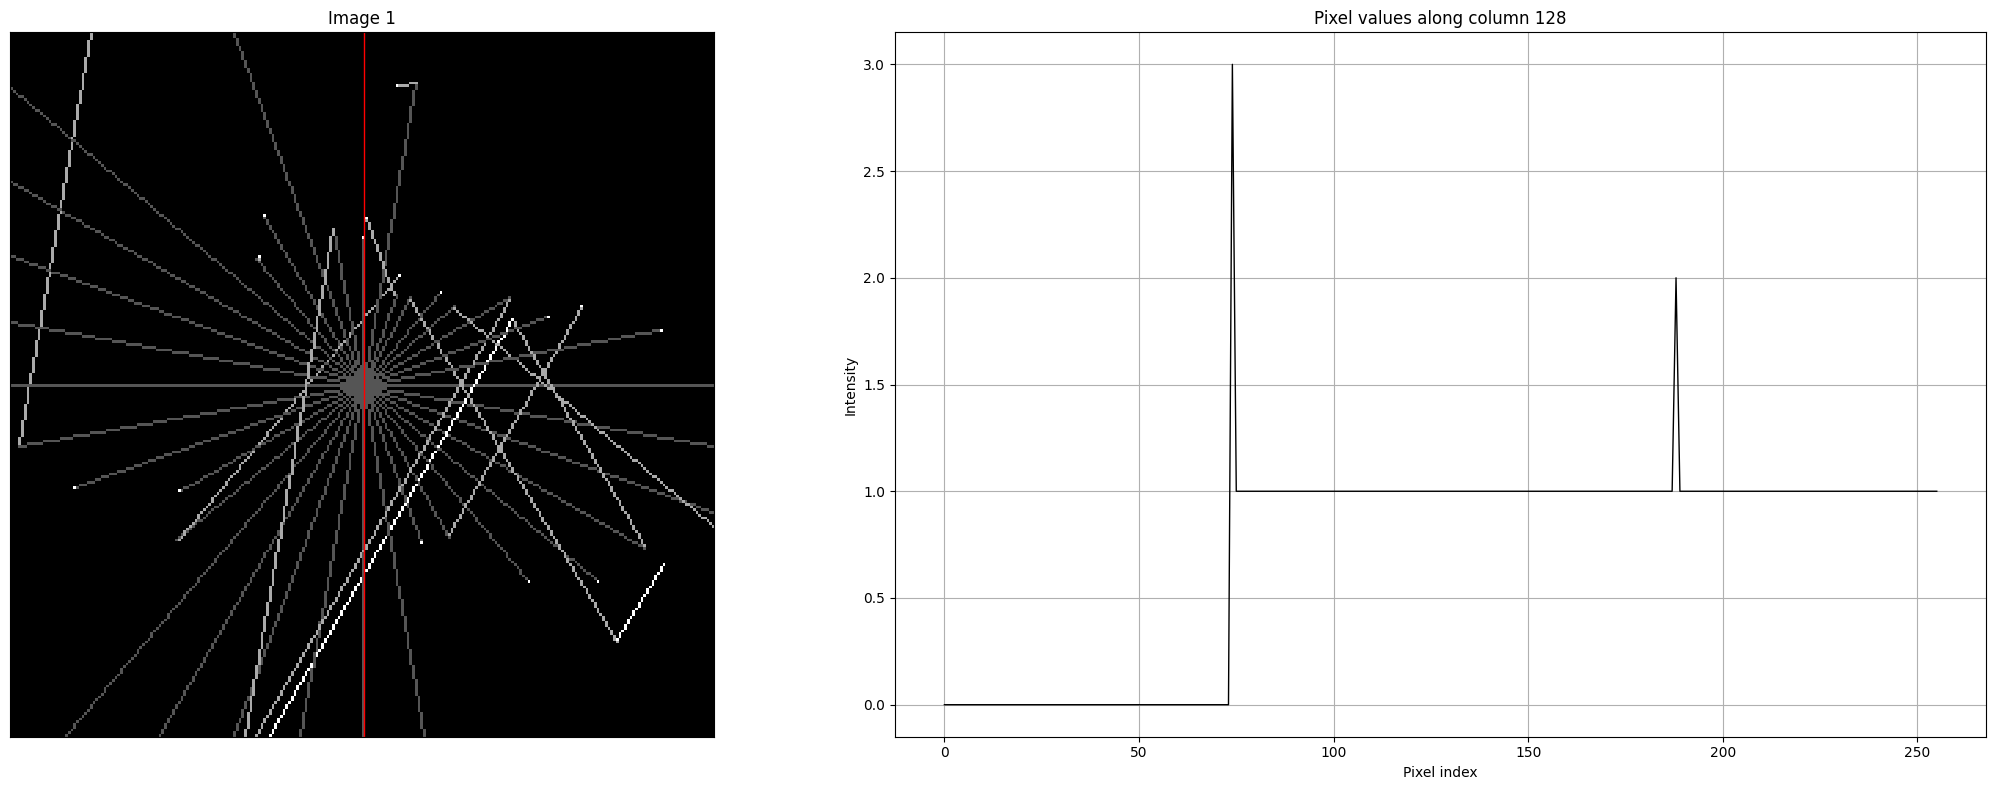

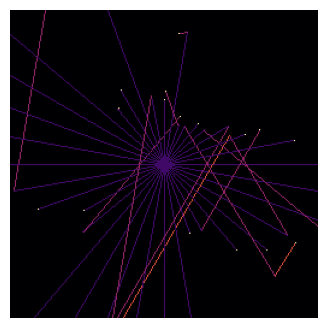

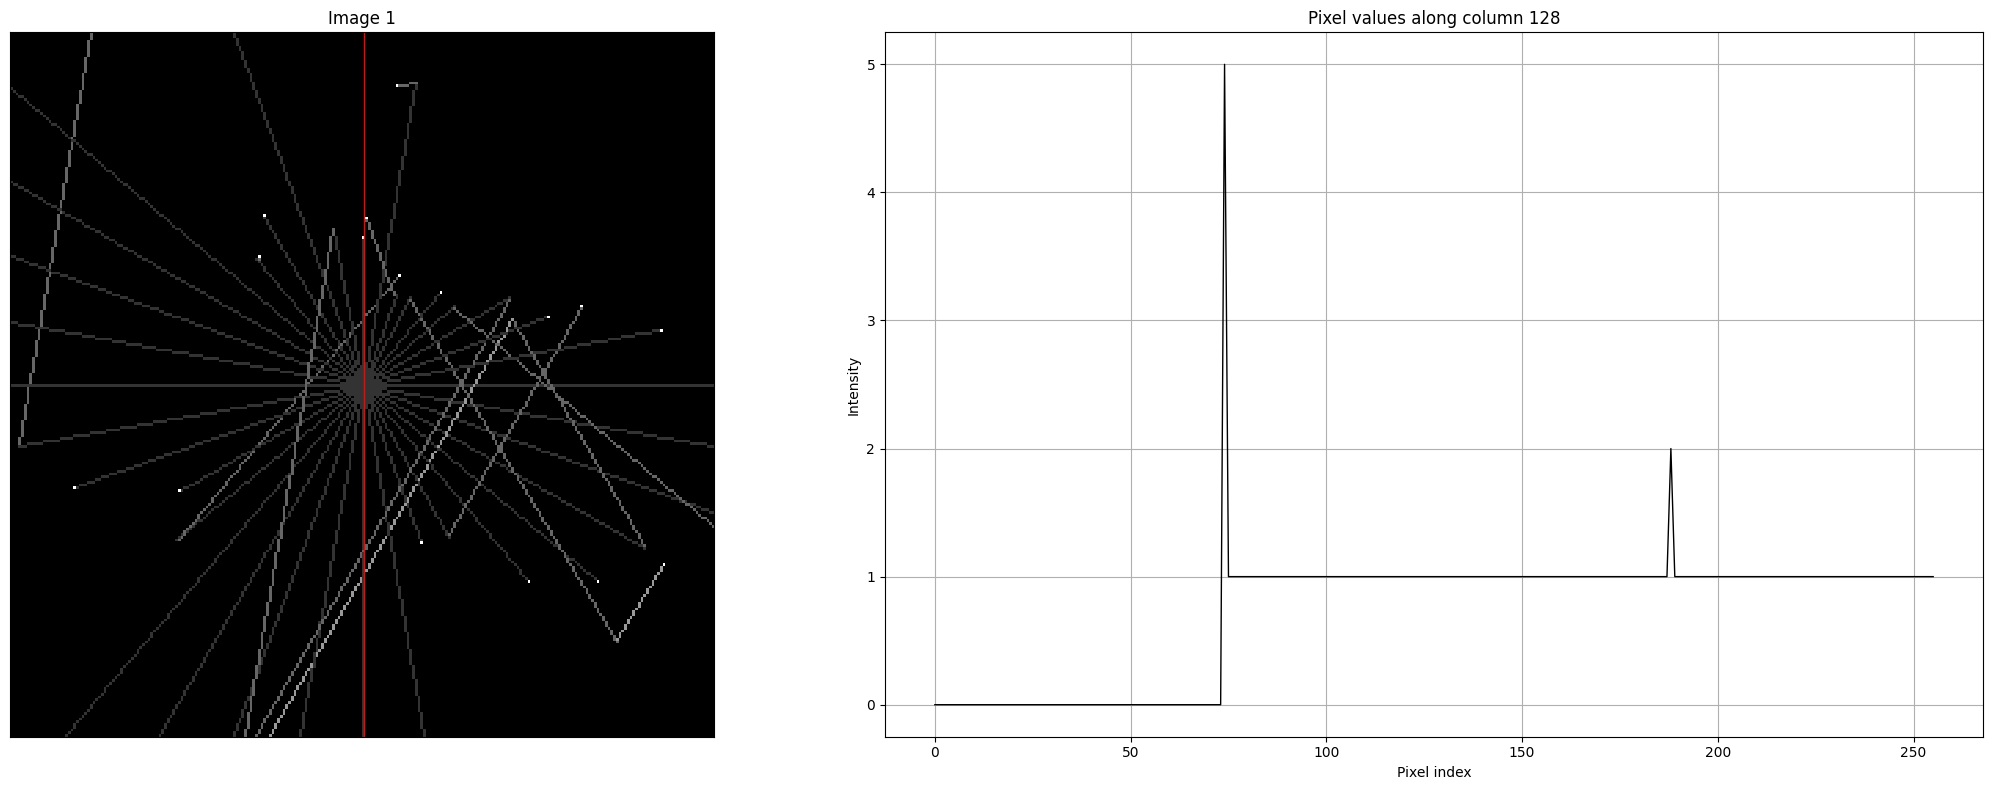

In [42]:
rays_ = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=10),
                                   wall_values=None, 
                                   wall_thickness=1,
                                   img_border_also_collide=False,
                                   reflexion_order=5,
                                   should_scale_rays=True,
                                   should_scale_img=True)

ray_img = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=[1.0, 2.0, 3.0], ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4, cmap="inferno")
ips.img.show_image_with_line_and_profile(imgs=[ray_img], axis='column', index=None, titles=None, figsize=(11, 8));

ray_img = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=None, ray_value=[1.0, 2.0, 3.0, 4.0, 5.0], ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4, cmap="inferno")
ips.img.show_image_with_line_and_profile(imgs=[ray_img], axis='column', index=None, titles=None, figsize=(11, 8));

---
### Iterative Rays

Rays can also be computed iterative for every timestep or X timesteps. You can call every method with also these iterative rays. Difference is that it a spcific class the `RayIterator`. So it comes with own functions which can be called and direct operations are not possible, but most operations can be done the same as before with the standard rays (which are just a nested list). For example indexing still works, but will access only the last iteration. You can use the class as iterator or access the attribute `rays_collection` or use the `get_iteration` method to access other iterations.


Accessing works the same, example Ray: [(128.0, 128.0), (128.0, 128.0), (128.0, 128.0)]


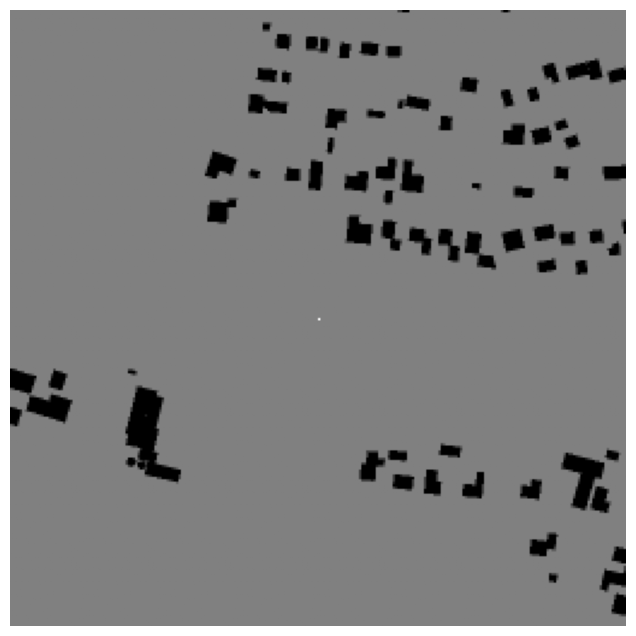

In [43]:
rays_ = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=img_src, 
                                   directions_in_degree=[22, 56, 90, 146, 234, 285, 320],
                                   wall_values=0.0, 
                                   wall_thickness=0,
                                   img_border_also_collide=False,
                                   reflexion_order=2,
                                   should_scale_rays=False,
                                   should_scale_img=True,
                                   iterative_tracking=True,
                                   iterative_steps=None
                                   )
print("\nAccessing works the same, example Ray:", rays_[0][0][:min(len(rays_[0][0])-1, 3)])

ray_imgs = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=False, original_max_width=None, original_max_height=None)

ips.img.imshow(ray_imgs[0], size=8)

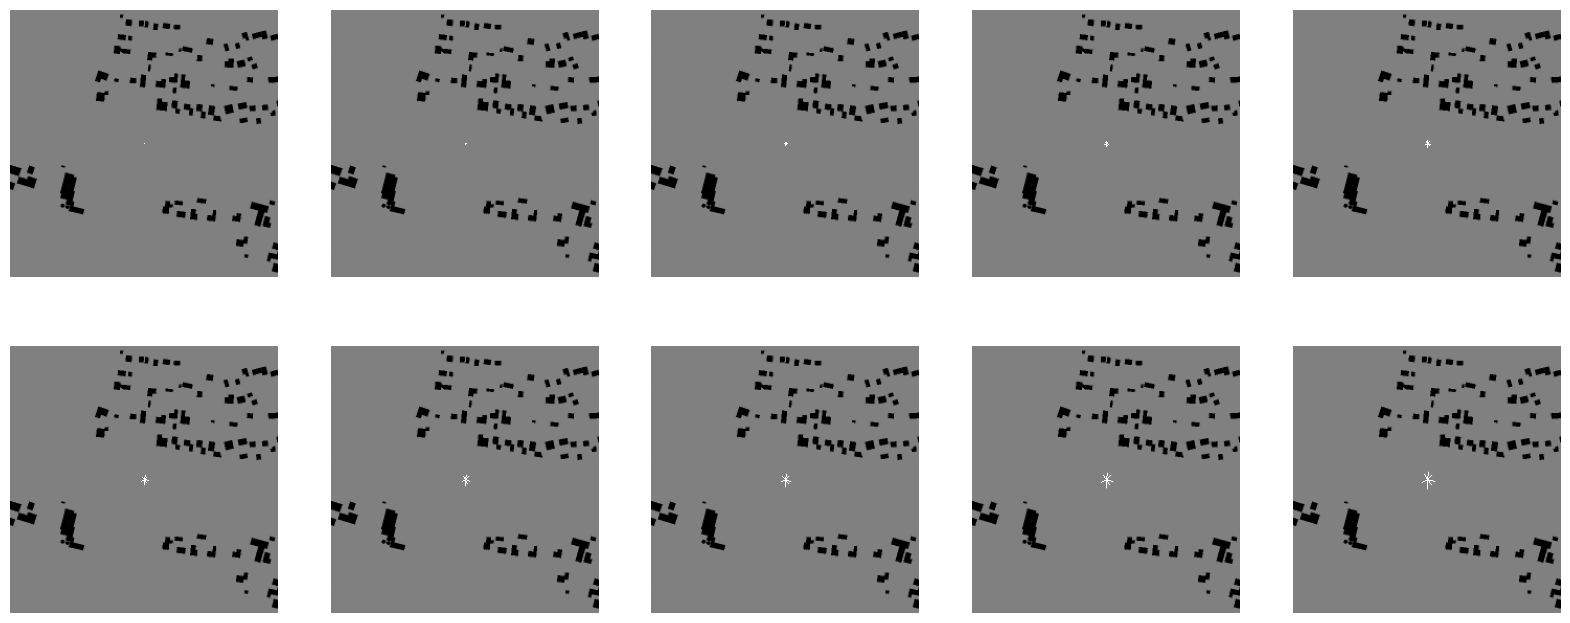

In [44]:
ips.img.advanced_imshow(ray_imgs[:10], title=None, image_width=4, axis=False,
                        color_space="gray", cmap=None, cols=5, save_to=None,
                        hspace=0.2, wspace=0.2,
                        use_original_style=False, invert=False)

Use `reduce_to_x_steps` method to limit the ray-iterator to x steps.

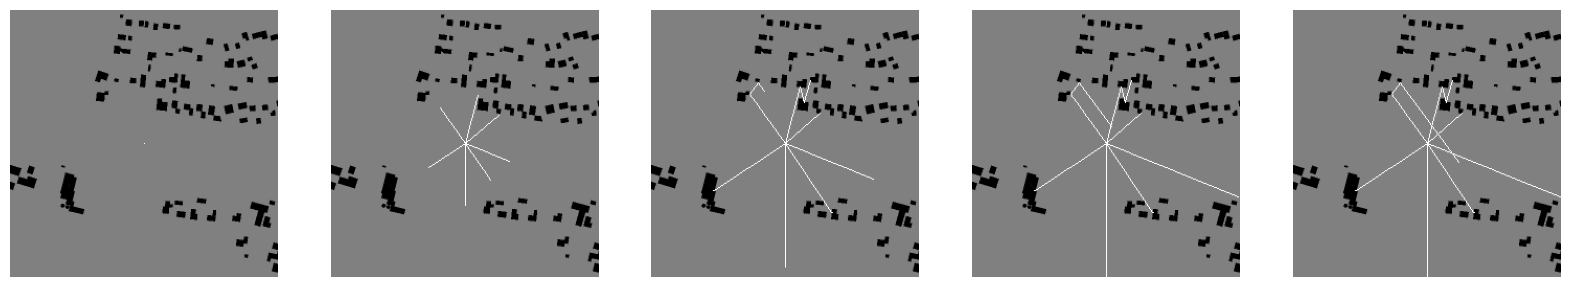

In [45]:
rays_.reduce_to_x_steps(5)

ray_imgs = ips.ray_tracing.draw_rays(rays_, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=img, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=False, original_max_width=None, original_max_height=None)

ips.img.advanced_imshow(ray_imgs, title=None, image_width=4, axis=False,
                        color_space="gray", cmap=None, cols=5, save_to=None,
                        hspace=0.2, wspace=0.2,
                        use_original_style=False, invert=False)

Indexing and len works just like for the standard rays but here the latest iteration is choosen

In [46]:
# Amount of Rays
len(rays_)

7

In [47]:
# Amount of Beams in the first Ray -> one reflection
len(rays_[0])

3

In [48]:
# Amount of Points in the first Beam of the first Ray
len(rays_[0][0])

83

RayIterator specific functionalities.

In [49]:
# Amount of Iterations (time-steps)
rays_.len_iterations()

5

In [50]:
rays_

RayIterator with 5 iterations (time-steps).

In [51]:
# Returns a standard rays structure at iteration 0
rays_.get_iteration(0)

[[[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]]]

In [52]:
rays_.get_iteration(-1)

[[[(128.0, 128.0),
   (128.0, 128.0),
   (128.0, 128.0),
   (127.27345747199463, 127.0),
   (127.0, 126.62361807952882),
   (126.54691494398928, 126.0),
   (126.0, 125.24723615905765),
   (125.82037241598391, 125.0),
   (125.09382988797856, 124.0),
   (125.0, 123.87085423858647),
   (124.36728735997319, 123.0),
   (124.0, 122.49447231811531),
   (123.64074483196784, 122.0),
   (123.0, 121.11809039764414),
   (122.91420230396247, 121.0),
   (122.18765977595712, 120.0),
   (122.0, 119.74170847717296),
   (121.46111724795175, 119.0),
   (121.0, 118.36532655670179),
   (120.7345747199464, 118.0),
   (120.00803219194103, 117.0),
   (120.0, 116.98894463623061),
   (119.28148966393567, 116.0),
   (119.0, 115.61256271575944),
   (118.5549471359303, 115.0),
   (118.0, 114.23618079528828),
   (117.82840460792494, 114.0),
   (117.10186207991958, 113.0),
   (117.0, 112.8597988748171),
   (116.37531955191422, 112.0),
   (116.0, 111.48341695434593),
   (115.64877702390886, 111.0),
   (115.0, 110.107

In [53]:
rays_.apply_and_update(lambda rays: rays*2)
print(rays_.get_iteration(0))
rays_.apply_and_update(lambda rays: rays[:len(rays)//2])
rays_.get_iteration(0)

[[[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]]]


[[[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]]]

In [54]:
# get max point of every ray
result = rays_.apply_and_return(lambda rays: max(rays[0][0]))
result

[(128.0, 128.0),
 (128.0, 128.0),
 (128.0, 128.0),
 (128.0, 128.0),
 (128.0, 128.0)]

Operations

In [55]:
ray_iter_2 = ips.ray_tracing.RayIterator(rays_)
print(ray_iter_2.get_iteration(0))
ray_iter_2.apply_and_update(lambda rays: [ [ [(x+12, y+12) for x, y in beam] for beam in ray] for ray in rays] )
ray_iter_2.get_iteration(0)

[[[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]], [[(128.0, 128.0)]]]


[[[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]]]

In [56]:
merged_iter = rays_ + ray_iter_2
merged_iter.get_iteration(0)

[[[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]]]

In [57]:
merged_iter = ips.ray_tracing.merge(rays_, ray_iter_2)
merged_iter.get_iteration(0)

[[[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]]]

In [58]:
ray_iter_2 += rays_
ray_iter_2.get_iteration(0)

[[[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]]]

Ray operations also work on RayIterators, as we already saw the indexing, len, draw_rays and merge.

In [59]:
ips.ray_tracing.print_rays_info(ray_iter_2)

Ray Iterator with 5 iterations (time-steps).
Latest Rays Info:

Rays: 14
Beams: 34
    - Mean Beams per Ray: 2.4
        - Median: 3.0
        - Max: 3
        - Min: 1
        - Variance: 0.9
Reflexions: 20
    - Mean Reflexions per Ray: 1.4
        - Median: 2.0
        - Max: 2
        - Min: 0
        - Variance: 0.9
Points: 1930
    - Mean Points per Beam: 56.8
        - Median: 27.0
        - Max: 180
        - Min: 2
        - Variance: 56.9
    - Mean Point Values: 2.0
        - Median: 2.0
        - Variance: 0.0

Value-Range:
  x ∈ [60.00, 268.00]
  y ∈ [68.43, 268.00]

Example:
Ray 1, beams: 3
Ray 1, beam 1, points: 83
Ray 1, beam 1, point 1: 2




In [60]:
ips.ray_tracing.save(path="./my_awesome_ray_iterator", rays=ray_iter_2)
loaded_iter = ips.ray_tracing.open(path="./my_awesome_ray_iterator", is_iterator=True)
loaded_iter.get_iteration(0)

[[[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(128.0, 128.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]],
 [[(140.0, 140.0)]]]

---
### Comparison with Physgen Reflections

In [61]:
input_, output_ = get_image(mode='train', variation="sound_reflection", input_type="osm", output_type="complex_only", 
               shuffle=False, return_output=True, as_numpy_array=True)

input_src = "./cache_img_1_input.png"
ips.img.save(input_, input_src, should_scale=False)

output_src = "./cache_img_1_output.png"
ips.img.save(output_, output_src, should_scale=False)

PhysGen (sound_reflection) Dataset for train got created


In [62]:
rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=input_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=10),
                                   wall_values=None, 
                                   wall_thickness=0,
                                   img_border_also_collide=False,
                                   reflexion_order=3,
                                   should_scale_rays=True,
                                   should_scale_img=False)
ips.ray_tracing.print_rays_info(rays)

d:\Programme\Anaconda\envs\img-phy-sim\Lib\site-packages\numpy\_core\numeric.py:353: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


Rays: 36
Beams: 135
    - Mean Beams per Ray: 3.8
        - Median: 4.0
        - Max: 4
        - Min: 1
        - Variance: 0.8
Reflexions: 99
    - Mean Reflexions per Ray: 2.8
        - Median: 3.0
        - Max: 3
        - Min: 0
        - Variance: 0.8
Points: 5039
    - Mean Points per Beam: 37.3
        - Median: 2.0
        - Max: 204
        - Min: 2
        - Variance: 49.2
    - Mean Point Values: 2.0
        - Median: 2.0
        - Variance: 0.0

Value-Range:
  x ∈ [0.11, 1.00]
  y ∈ [-0.00, 1.00]

Example:
Ray 1, beams: 4
Ray 1, beam 1, points: 38
Ray 1, beam 1, point 1: 2




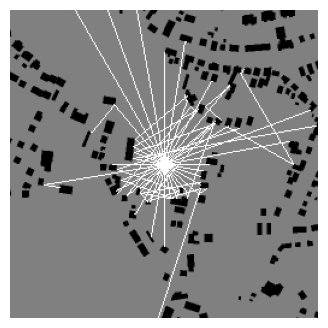

In [63]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=input_, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

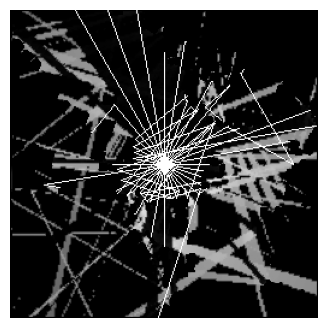

In [64]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=output_, ray_value=0.5, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

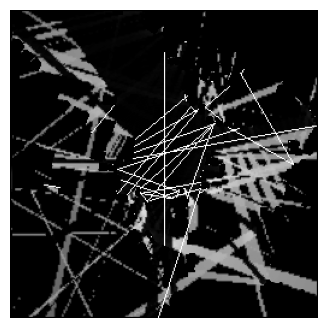

In [65]:
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=output_, ray_value=0.5, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None,
                                    show_only_reflections=True)
ips.img.imshow(ray_img, size=4)

On normal target (not only complex)

PhysGen (sound_reflection) Dataset for train got created


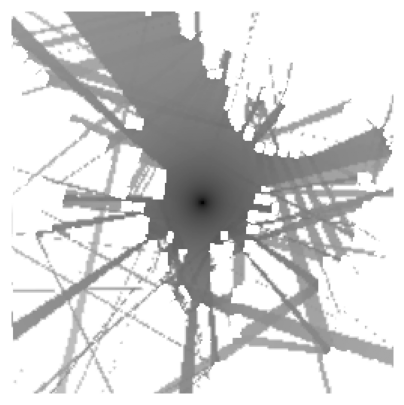

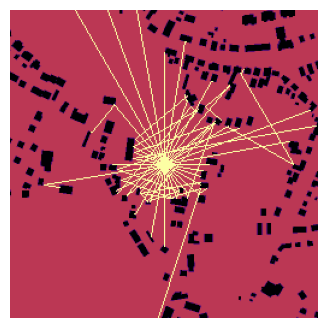

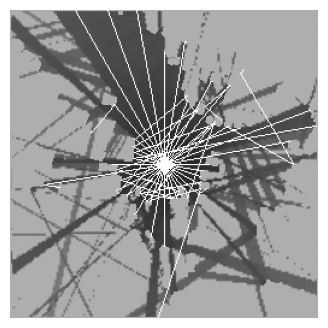

In [66]:
# get image
input_, output_ = get_image(mode='train', variation="sound_reflection", input_type="osm", output_type="standard", 
               shuffle=False, return_output=True, as_numpy_array=True)

input_src = "./cache_img_1_input.png"
ips.img.save(input_, input_src, should_scale=False)

output_src = "./cache_img_1_output.png"
ips.img.save(output_, output_src, should_scale=False)

ips.img.imshow(output_, size=5)

# calc rays
rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=input_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=10),
                                   wall_values=None, 
                                   wall_thickness=0,
                                   img_border_also_collide=False,
                                   reflexion_order=3,
                                   should_scale_rays=True,
                                   should_scale_img=False)

# show rays on input
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=input_, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4, cmap="inferno")

# show rays on output
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=output_, ray_value=1.3, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

With more rays

PhysGen (sound_reflection) Dataset for train got created


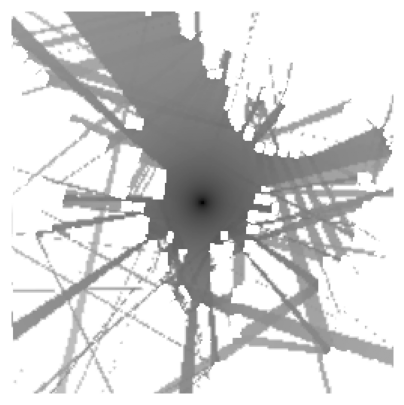

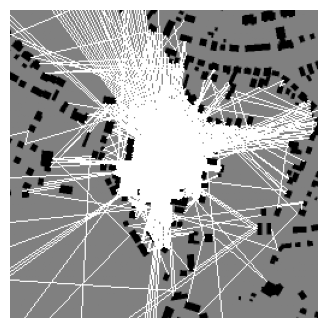

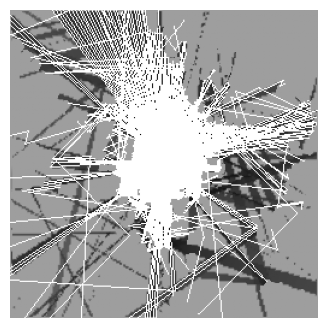

In [67]:
# get image
input_, output_ = get_image(mode='train', variation="sound_reflection", input_type="osm", output_type="standard", 
               shuffle=False, return_output=True, as_numpy_array=True)

input_src = "./cache_img_1_input.png"
ips.img.save(input_, input_src, should_scale=False)

output_src = "./cache_img_1_output.png"
ips.img.save(output_, output_src, should_scale=False)

ips.img.imshow(output_, size=5)

# calc rays
rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=input_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=1),
                                   wall_values=None, 
                                   wall_thickness=1,
                                   img_border_also_collide=False,
                                   reflexion_order=3,
                                   should_scale_rays=True,
                                   should_scale_img=False)

# show rays on input
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=input_, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

# show rays on output
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=output_, ray_value=1.3, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None)
ips.img.imshow(ray_img, size=4)

In [68]:
# get image
input_, output_ = get_image(mode='train', variation="sound_reflection", input_type="osm", output_type="standard", 
               shuffle=False, return_output=True, as_numpy_array=True)

input_src = "./cache_img_1_input.png"
ips.img.save(input_, input_src, should_scale=False)

output_src = "./cache_img_1_output.png"
ips.img.save(output_, output_src, should_scale=False)

PhysGen (sound_reflection) Dataset for train got created


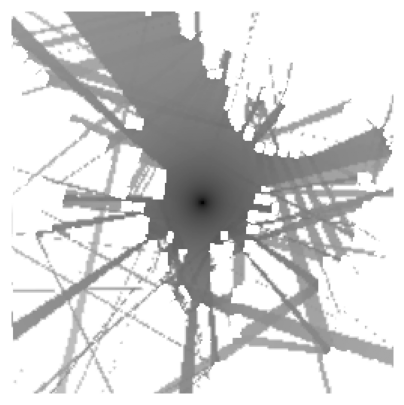

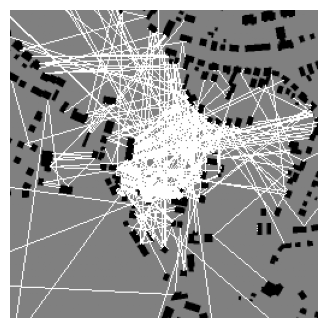

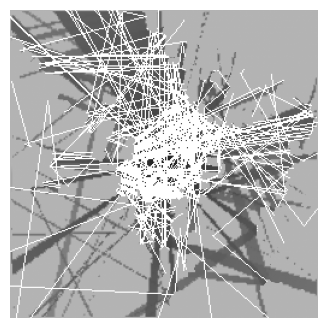

In [69]:
# get image
ips.img.imshow(output_, size=5)

# calc rays
rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=input_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=1),
                                   wall_values=None, 
                                   wall_thickness=0,
                                   img_border_also_collide=False,
                                   reflexion_order=3,
                                   should_scale_rays=True,
                                   should_scale_img=False)

# show rays on input
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=input_, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None,
                                    show_only_reflections=True)
ips.img.imshow(ray_img, size=4)

# show rays on output
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=output_, ray_value=1.3, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None,
                                    show_only_reflections=True)
ips.img.imshow(ray_img, size=4)

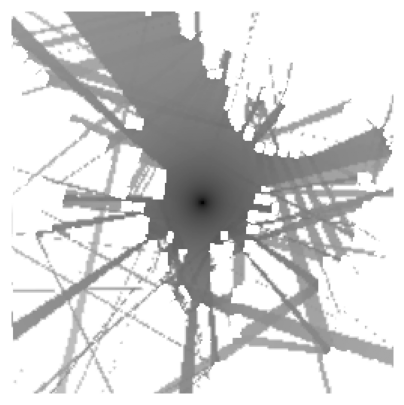

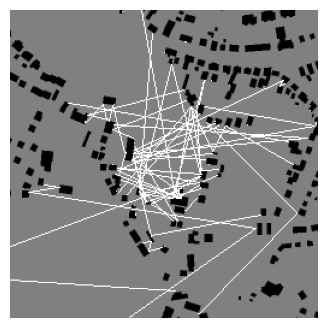

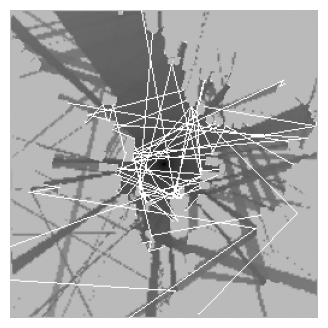

In [70]:
ips.img.imshow(output_, size=5)

# calc rays
rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
                                   img_src=input_src, 
                                   directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=5),
                                   wall_values=None, 
                                   wall_thickness=1,
                                   img_border_also_collide=False,
                                   reflexion_order=3,
                                   should_scale_rays=True,
                                   should_scale_img=False)

# show rays on input
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=input_, ray_value=2, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None,
                                    show_only_reflections=True)
ips.img.imshow(ray_img, size=4)

# show rays on output
ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
                                    output_format="single_image", 
                                    img_background=output_, ray_value=1.3, ray_thickness=1, 
                                    img_shape=(256, 256), dtype=float, standard_value=0,
                                    should_scale_rays_to_image=True, original_max_width=None, original_max_height=None,
                                    show_only_reflections=True)
ips.img.imshow(ray_img, size=4)

In [71]:
# # get image
# ips.img.imshow(output_, size=5)

# # calc rays
# rays = ips.ray_tracing.trace_beams(rel_position=[0.5, 0.5], 
#                                    img_src=input_src, 
#                                    directions_in_degree=ips.math.get_linear_degree_range(start=0, stop=360, step_size=0.1),
#                                    wall_values=None, 
#                                    wall_thickness=0,
#                                    img_border_also_collide=False,
#                                    reflexion_order=3,
#                                    should_scale_rays=True,
#                                    should_scale_img=False)

# # show rays on input
# ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
#                                     output_format="single_image", 
#                                     img_background=input_, ray_value=2, ray_thickness=1, 
#                                     img_shape=(256, 256), dtype=float, standard_value=0,
#                                     should_scale_rays_to_image=True, original_max_width=None, original_max_height=None,
#                                     show_only_reflections=True)
# ips.img.imshow(ray_img, size=4)

# # show rays on output
# ray_img = ips.ray_tracing.draw_rays(rays, detail_draw=False, 
#                                     output_format="single_image", 
#                                     img_background=output_, ray_value=1.3, ray_thickness=1, 
#                                     img_shape=(256, 256), dtype=float, standard_value=0,
#                                     should_scale_rays_to_image=True, original_max_width=None, original_max_height=None,
#                                     show_only_reflections=True)
# ips.img.imshow(ray_img, size=4)

---